### Topics:

* Calcularea **vectorilor si valorilor proprii**
* Calcularea valorilor proprii prin descompuneri $LU$
* Descompunerea dupa valori singulare

Applicatii practice:
* https://en.wikipedia.org/wiki/Eigenface
* https://en.wikipedia.org/wiki/Principal_component_analysis
* https://www.math.arizona.edu/~brio/VIGRE/ThursdayTalk.pdf


### Imports

In [29]:
import copy
import math

import numpy as np
import plotly.graph_objects as go
np.set_printoptions(suppress=True)

def plot_matrix_evolution(evo, title):
    window_length = 1
    fig = go.Figure()
    for step in range(len(evo)):
        fig.add_trace(go.Heatmap(z=evo[step][::-1],colorscale="RdBu",zmid=0))
    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                  {"title": title},
                  ],
            label=str(window_length * i))
        step["args"][0]["visible"][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        pad={"t": 5},
        steps=steps
    )]

    fig.update_layout(sliders=sliders)

    fig.show()

def get_indexes(A):
    maxim = float('-inf')
    n = len(A)
    p = q = 0
    for i in range(0, n):
        for j in range(0, n):
            if abs(A[i][j]) > maxim and i != j:
                maxim, p, q = abs(A[i][j]), i, j
    return p, q


def get_theta(A, p, q):
    alfa = (A[p][p] - A[q][q]) / (2 * A[p][q])
    t = 0
    if alfa >= 0:
        t = -alfa + math.sqrt(pow(alfa, 2) + 1)
    else:
        t = -alfa - math.sqrt(pow(alfa, 2) + 1)
    c = 1 / math.sqrt(1 + pow(t, 2))
    s = t / math.sqrt(1 + pow(t, 2))
    return t, c, s


def rotate(n, p, q, c, s):
    R = [[0 for _ in range(0, n)]] * n
    for i in range(0, n):
        for j in range(0, n):
            if i == j and i != p and i != q:
                R[i][j] = 1
            elif i == j and (i == p or i == q):
                R[i][j] = c
            elif i == p and j == q:
                R[i][j] = s
            elif i == q and j == p:
                R[i][j] = -s
            else:
                R[i][j] = 0
    return np.array(R)


def check_matrix(A):
    n = len(A)
    for i in range(0, n):
        for j in range(0, n):
            if i != j and A[i][j] != 0:
                return False
    return True


def computeA(A, t, c, s, p, q):
    n = len(A)
    a = copy.deepcopy(A)
    for j in range(0, n):
        if j != p and j != q:
            a[p][j] = c * a[p][j] + s * a[q][j]
            a[q][j] = (-s) * a[j][p] + c * a[q][j]
            a[j][q] = (-s) * a[j][p] + c * a[q][j]
            a[j][p] = a[p][j]
    a[p][p] = a[p][p] + t * a[p][q]
    a[q][q] = a[q][q] - t * a[p][q]
    a[p][q] = 0
    a[q][p] = 0

    return np.array(a)


def computeU(U, p, q, c, s):
    n = len(U)
    u = copy.deepcopy(U)
    for i in range(0, n):
        aux1 = u[i][p]
        u[i][p] = c * u[i][p] + s * u[i][q]
        aux2 = u[i][q]
        u[i][q] = (-s) * aux1 + c * aux2
    return np.array(u)


def jacobi_method(A):
    eps = 10 ** -15
    n = len(A)
    # print(n)
    kmax = 1000
    k = 0
    U = np.identity(n)
    p, q = get_indexes(A)
    # print("p=",p,"\nq=",q)
    t, c, s = get_theta(A, p, q)
    A_init = copy.deepcopy(A)
    evolution=[]
    evolution.append(A_init)

    while abs(A[p][q]) > eps and k < kmax:
        # R = rotate(len(A), p, q, c, s)
        A = computeA(A, t, c, s, p, q)
        evolution.append(A)
        # print("pas ",k,'\nA = ',A,'\nA_init = ', A_init)
        U = computeU(U, p, q, c, s)
        p, q = get_indexes(A)
        # print("p=", p, "\nq=", q)

        if abs(A[p][q]) > eps:
            t, c, s = get_theta(A, p, q)
        k += 1
    # plot_matrix_evolution(evolution,"Jacobi algorithm matrix evolution")
    return np.array(A), np.array(U), evolution

def eigen_sum(m1, m2):
    our_eigenvalues = m1.diagonal()
    library_eigenvalues = np.linalg.eigvals(np.array(m2))

    suma = 0
    for k in range(len(library_eigenvalues)):
        min = float('+inf')
        for i in range(len(our_eigenvalues)):
            if abs(our_eigenvalues[i] - library_eigenvalues[k]) < min:
                min = abs(our_eigenvalues[i] - library_eigenvalues[k])
        suma += min
    return suma


### Vectori si valori proprii

Fie $A \in \mathbf{R}^{n \times n}$ o matrice reală de dimensiune $n$. Se numeşte valoare proprie asociată matricei $A,$ numărul complex $\lambda \in \mathbf{C},$ pentru care există un vector nenul $u \neq 0$ numit şi vector propriu asociat valorii proprii $\lambda$ pentru care:
$$
A u=\lambda u
$$

In mod intuitiv, un vector propriu este un vector care in urma transformarii cu matricea $A$ este ca si cum am scala vectorul $u$ cu scalarul $\lambda$.

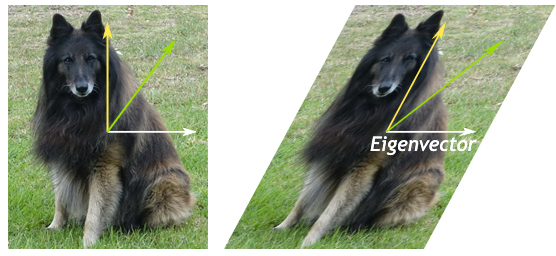

Alte vizualizari:
* https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#/media/File:Eigenvectors_of_a_linear_operator.gif
* https://en.wikipedia.org/wiki/File:Eigenvectors-extended.gif

Un video care explica intuitiv ce sunt vectorii si valorile proprii: https://www.youtube.com/watch?v=PFDu9oVAE-g (3b1b)


#### Metoda Jacobi

Ideea algoritmului lui Jacobi este de a construi un şir de matrice simetrice, asemenea cu matricea inițială , şir care converge la o matrice diagonală. Matricea diagonală limită va fi asemenea cu matricea inițială $A$ şi prin urmare pe diagonala acestei matrice limită vom găsi valorile proprii căutate.

Şirul de matrice $\left\{A^{(k)}\right\} \subseteq \mathbf{R}^{n \times n}$ se construieşte stfel:
$$
A^{(0)}=A \quad, \quad A^{(k+1)}=R_{p q}(\theta) A^{(k)} R_{p q}^{T}(\theta)
$$
unde $R_{p q}(\theta)$ sunt matrice de rotație.

$R_{p q}(\theta)=R_{p q}=\left(\begin{array}{cccccccc}1 & 0 & \cdots & 0 & \cdots & 0 & \cdots & 0 \\ 0 & 1 & \cdots & 0 & \cdots & 0 & \cdots & 0 \\ \vdots & & & & & & & \\ 0 & 0 & \cdots & c & \cdots & s & \cdots & 0 \\ \vdots & & & & & & & \\ 0 & 0 & \cdots & -s & \cdots & c & \cdots & 0 \\ \vdots & & & & & & & \\ 0 & 0 & \cdots & 0 & \cdots & 0 & \cdots & 1\end{array}\right)$

- indicii $(p, q)$ sunt aleşi ca fiind indicii celui mai mare element nediagonal din matrice luat în valoare absolută:
$$
\begin{aligned}
\left|a_{p q}^{(k)}\right| &=\max \left\{\left|a_{i j}^{(k)}\right| ; i=1, \ldots, n, j=1, \ldots, n, i \neq j\right\}=\left(A=A^{T}\right)=\\
&=\max \left\{\left|a_{i j}^{(k)}\right| ; i=2, \ldots, n, j=1, \ldots, i-1\right\}
\end{aligned}
$$
(datorită simetriei matricelor din şir, se poate căuta elementul $a_{p q}^{(k)}$ de mai sus doar în partea strict inferior triunghiulară a matricei $\left.A^{(k)}\right)$
- unghiul $\theta(c=\cos \theta, s=\sin \theta, t=\operatorname{tg} \theta)$ este ales astfel ca elementele
$(p, q)$ şi $(q, p)$ ale matricei $A^{(k+1)}$ să fie zero, i.e.,
$$
a_{p q}^{(k+1)}=a_{q p}^{(k+1)}=0
$$

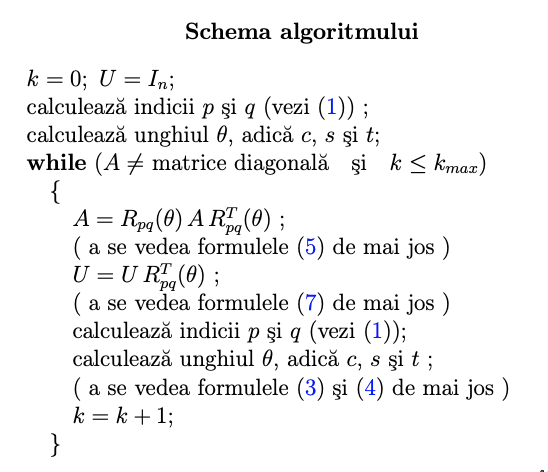


Vizual, metoda Jacobi aplica rotatii succesive asupra matricei A pana cand suprapune vectorii proprii cu axele spatiului (n dimensional).

Vizualizare a metodei: https://youtu.be/dQQ2PXo2maM?t=87


In [30]:
A =  [[0, 0, 1], [0, 0, 1], [1, 1, 1]]
A

[[0, 0, 1], [0, 0, 1], [1, 1, 1]]

In [31]:
lambda_diag, U, matrix_evolution = jacobi_method(A)
lambda_diag, U

(array([[-1.,  0., -0.],
        [ 0., -0.,  0.],
        [-0.,  0.,  2.]]),
 array([[ 0.57735027, -0.70710678,  0.40824829],
        [ 0.57735027,  0.70710678,  0.40824829],
        [-0.57735027, -0.        ,  0.81649658]]))

In [32]:
np.linalg.norm(A @ U - U @ lambda_diag)

6.352106948187225e-10

In [33]:
plot_matrix_evolution(matrix_evolution, "Jacobi algorithm matrix rotations evolution")

### Descompunerea dupa valori singulare

Descompunerea dupa valori proprii este o generalizare a descompunerii dupa valori si vectori proprii a matricelor simetrice pentru matrici de orice dimensiune.

Fie $A \in \mathbf{R}^{p \times n}$. Se numeşte decompunere după valori singulare a matricei:
$$
A=U S V^{T} \quad, \quad U \in \mathbf{R}^{p \times p}, S \in \mathbf{R}^{p \times n}, V \in \mathbf{R}^{n \times n}
$$
$\text{cu } U=\left[u_{1} u_{2} \ldots u_{p}\right]$ (vectorii $u_{i}$ sunt coloanele matricei $\left.U\right)$ şi $V=\left[v_{1} v_{2} \ldots v_{n}\right]$ matrice ortogonale iar $S$ matrice de forma:
$$
\begin{array}{c}
\text { pentru } p \leq n: S=\left(\begin{array}{cccccc}
\sigma_{1} & 0 & \cdots & 0 & \cdots & 0 \\
0 & \sigma_{2} & \cdots & 0 & \cdots & 0 \\
\vdots & & & & & \\
0 & 0 & \cdots & \sigma_{p} & \cdots & 0
\end{array}\right) \in \mathbf{R}^{p \times n} \\
\text { pentru } p>n: S=\left(\begin{array}{cccc}
\sigma_{1} & 0 & \cdots & 0 \\
0 & \sigma_{2} & \cdots & 0 \\
\vdots & & & \\
0 & 0 & \cdots & \sigma_{n} \\
\vdots & & & \\
0 & 0 & \cdots & 0
\end{array}\right) \in \mathbf{R}^{p \times n}
\end{array}
$$
unde numerele nenegative $\sigma_{i} \geq 0, \forall i$ sunt valorile singulare ale matricei $A$.



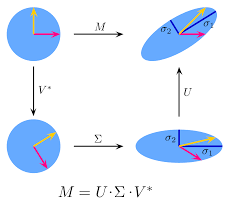

In [34]:
def get_svd_matrix_example():
    return np.array([[0, 0, 1, 2], [0, 0, 1, 2], [1, 1, 3, 2]])

In [35]:
A = get_svd_matrix_example()
A

array([[0, 0, 1, 2],
       [0, 0, 1, 2],
       [1, 1, 3, 2]])

In [36]:
U, S, V = np.linalg.svd(A)
U, S, V

(array([[-0.43449653,  0.55786447, -0.70710678],
        [-0.43449653,  0.55786447,  0.70710678],
        [-0.78893949, -0.61447089,  0.        ]]),
 array([4.76553134, 1.51317913, 0.        ]),
 array([[-0.16555121, -0.16555121, -0.67900331, -0.69580177],
        [-0.40607941, -0.40607941, -0.48089728,  0.66252308],
        [ 0.78282113, -0.61514649, -0.08383732,  0.04191866],
        [ 0.44145598,  0.65520005, -0.54832801,  0.27416401]]))

Rangul matricei $A$ este numărul de valori singulare strict pozitive:
$$
\operatorname{rang}(A)=\text { numărul de valori singulare } \sigma_{i}>0
$$

In [37]:
def matrix_rank_svd(S):
    valori_singulare_nenule = [i for i in S if i > 0]
    return len(valori_singulare_nenule)

In [38]:
matrix_rank_svd(S)

3

Numărul de conditionare al matricei $A$ este raportul dintre cea mai mare valoare singulară şi cea mai mică valoare singulară strict pozitivă.
$$
\begin{array}{c}
k_{2}(A)=\frac{\sigma_{\mathrm{max}}}{\sigma_{\min }} \\
\sigma_{\max }=\max \left\{\sigma_{i} ; \sigma_{i} \text { valoare singulară }\right\} \\
\sigma_{\min }=\min \left\{\sigma_{i} ; \sigma_{i}>0 \text { valoare singulară }\right\}
\end{array}
$$

In [39]:
def matrix_conditioning_number_svd(S):
    valori_singulare = [i for i in S if i >= 0]
    valori_singulare_nenule = [i for i in S if i > 0]
    maxim = max(valori_singulare)
    minim = min(valori_singulare_nenule)
    return maxim / minim

In [40]:
matrix_conditioning_number = matrix_conditioning_number_svd(S)
matrix_conditioning_number

4.99658859089361e+16

Pseudoinversa Moore-Penrose a matricei $A, A^{I} \in \mathbf{R}^{n \times p}$
$$
A^{I}=V S U^{T}
$$

In [41]:
def get_moore_penrose_inverse(V, S, U):
    valori_singulare_nenule = [i for i in S if i > 0]
    SI = np.zeros((len(A[0]), len(A)))

    for i in range(len(valori_singulare_nenule)):
        SI[i][i] = 1 / valori_singulare_nenule[i]

    mpi = np.dot(np.dot(V.transpose(), SI), U.transpose())
    return mpi

In [42]:
A_I = get_moore_penrose_inverse(V, S, U)
A_I 

array([[-5.80376481e+15,  5.80376481e+15,  5.76795551e-01],
       [ 4.56064025e+15, -4.56064025e+15, -1.09825640e-01],
       [ 6.21562278e+14, -6.21562278e+14,  2.66515045e-01],
       [-3.10781139e+14,  3.10781139e+14, -1.33257522e-01]])

Calculati matricea pseudo-inversă în sensul celor mai mici pătrate:
$$
A^{J}=\left(A^{T} * A\right)^{-1} * A^{T}
$$

In [43]:
A = np.random.randint(-10, 10, size=(5, 5))

In [44]:
def get_least_squares_pseudo_inverse(A):
    A = np.array(A)
    A_J = np.linalg.inv(A.transpose() @ A) @ A.transpose()
    return A_J

In [45]:
U, S, V = np.linalg.svd(A)
A_I = get_moore_penrose_inverse(V, S, U)

In [46]:
A_J = get_least_squares_pseudo_inverse(A)
norma = np.linalg.norm(A_I - A_J)
norma

7.217598927102397e-16